In [1]:
#importing nupy and pandas
import numpy as np
import pandas as pd

In [2]:
#loding data
stone  = pd.read_csv(r'C:\Users\abhay\Downloads\cubic_zirconia.csv')

In [3]:
# deleting the unnamed column as its a seriam number column and wont play any part in our further analysis
stone = stone.drop('Unnamed: 0', axis=1)

In [4]:
# checking the info of the data set again if unnamed column is deleted or not 
stone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [5]:
# treating null values and replacing them with mean value of the variable
stone.depth=stone.depth.fillna(stone.depth.mean())

In [6]:
#checking for null values after imputing
stone.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# replacing "0" values with mean of the variable
stone.x = stone.x.replace(0,stone.x.mean())

In [8]:
# checking for "0" values in variable "x" post imputation
stone[stone['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [9]:
# replacing "0" values with mean of the variable
stone.y = stone.y.replace(0,stone.y.mean())

In [10]:
# checking for "0" values in variable "y" post imputation
stone[stone['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [11]:
# replacing "0" values with mean of the variable
stone.z = stone.z.replace(0,stone.z.mean())

In [12]:
# checking for "0" values in variable "z" post imputation
stone[stone['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [13]:
#getting unique observations in string type variables
for column in stone.columns:
    if stone[column].dtype == 'object':
        print(column.upper(),': ',stone[column].nunique())
        print(stone[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [14]:
# encoding string data type variable to get dummies
stone = pd.get_dummies(stone, columns=['cut','color','clarity'],drop_first=True)

In [15]:
# checking head of dataset post encoding
stone.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


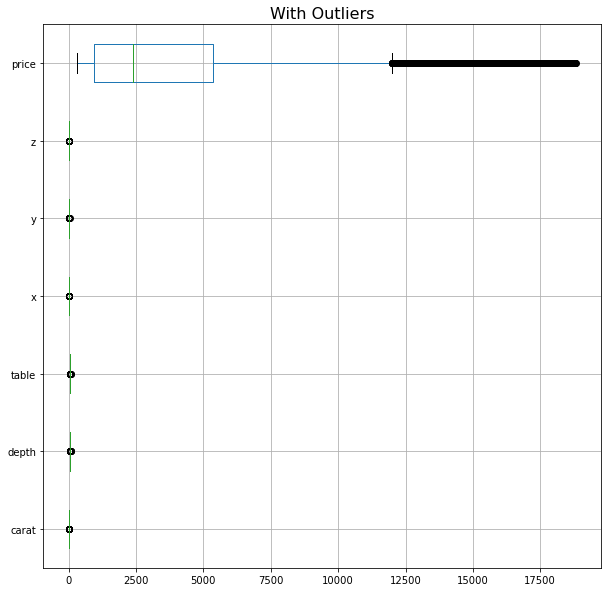

In [16]:
# construct box plot for continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
cont=stone.dtypes[(stone.dtypes!='uint8') & (stone.dtypes!='bool')].index
plt.figure(figsize=(10,10))
stone[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [17]:
# treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in stone[cont].columns:
    lr,ur=remove_outlier(stone[column])
    stone[column]=np.where(stone[column]>ur,ur,stone[column])
    stone[column]=np.where(stone[column]<lr,lr,stone[column])

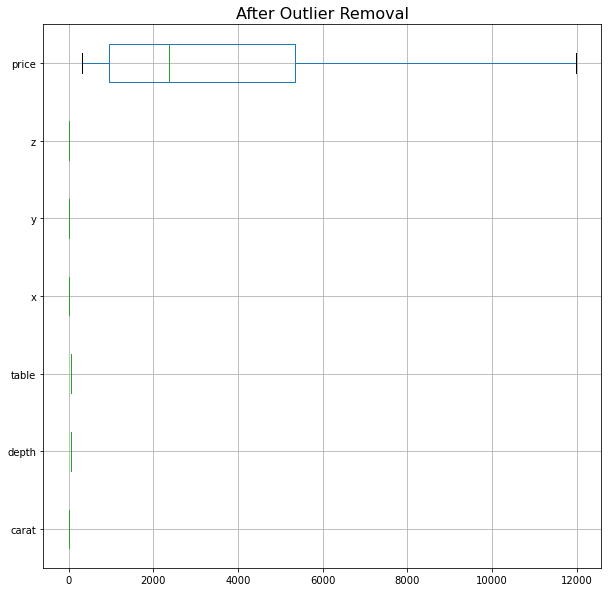

In [19]:
# checking outliers post treatment
plt.figure(figsize=(10,10))
stone[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

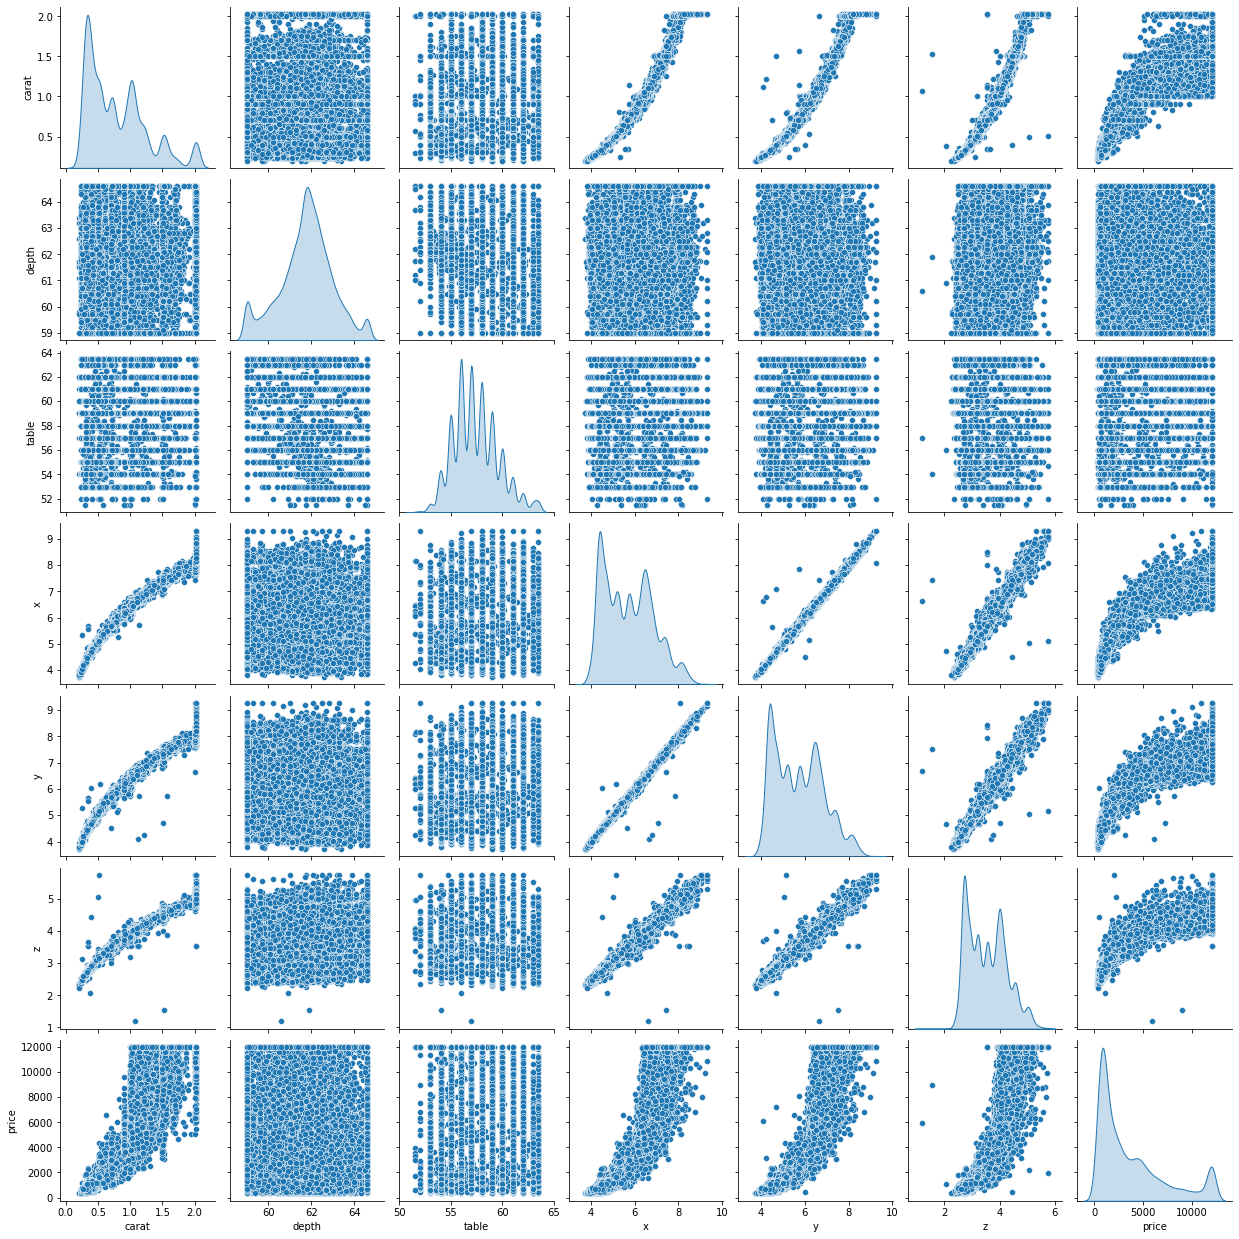

In [20]:
# pair plot to check on data distribution and co-linearity
stone_attr = (stone[cont])
sns.pairplot(stone_attr, diag_kind='kde')  
plt.show()

In [21]:
from scipy.stats import zscore
stone_scaled  = stone.apply(zscore)

In [22]:
stone_scaled

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067407,0.287900,0.261603,-1.296571,-1.289734,-1.261658,-0.933183,-0.315479,1.221986,-0.586329,...,-0.423557,-0.338413,-0.237771,-0.185171,1.761801,-0.452011,-0.423009,-0.540616,-0.270528,-0.321833
1,-1.002532,-0.778653,0.261603,-1.163391,-1.137707,-1.204183,-0.793447,-0.315479,-0.818340,1.705528,...,-0.423557,-0.338413,-0.237771,5.400410,-0.567601,-0.452011,-0.423009,-0.540616,-0.270528,-0.321833
2,0.230108,0.369942,1.188780,0.274951,0.346791,0.347664,0.735009,-0.315479,-0.818340,-0.586329,...,-0.423557,-0.338413,-0.237771,-0.185171,-0.567601,-0.452011,-0.423009,-0.540616,-0.270528,3.107198
3,-0.807904,-0.122313,-0.665574,-0.808245,-0.833653,-0.830590,-0.765211,-0.315479,1.221986,-0.586329,...,-0.423557,-0.338413,-0.237771,-0.185171,-0.567601,-0.452011,2.364015,-0.540616,-0.270528,-0.321833
4,-1.045782,-1.106823,0.725192,-1.225542,-1.164536,-1.276027,-0.852511,-0.315479,1.221986,-0.586329,...,-0.423557,-0.338413,-0.237771,-0.185171,-0.567601,-0.452011,-0.423009,-0.540616,3.696478,-0.321833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.684239,0.451985,0.261603,0.781035,0.704502,0.793102,0.481179,-0.315479,-0.818340,1.705528,...,-0.423557,-0.338413,-0.237771,-0.185171,1.761801,-0.452011,-0.423009,-0.540616,-0.270528,-0.321833
26963,-1.002532,0.123815,-1.129162,-1.145634,-1.173478,-1.146707,-0.755992,-0.315479,1.221986,-0.586329,...,2.360955,-0.338413,-0.237771,5.400410,-0.567601,-0.452011,-0.423009,-0.540616,-0.270528,-0.321833
26964,-0.613277,-0.040270,0.261603,-0.541885,-0.520657,-0.528842,-0.599833,-0.315479,-0.818340,1.705528,...,-0.423557,-0.338413,-0.237771,-0.185171,-0.567601,-0.452011,-0.423009,1.849742,-0.270528,-0.321833
26965,-1.132283,0.041772,-0.665574,-1.367600,-1.370219,-1.347872,-0.880458,-0.315479,-0.818340,-0.586329,...,-0.423557,-0.338413,-0.237771,-0.185171,-0.567601,-0.452011,-0.423009,-0.540616,-0.270528,3.107198


In [23]:
stone_scaled.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,...,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04
mean,2.549474e-16,-4.038892e-15,-5.372850e-16,5.002117e-17,4.806067e-16,9.046381e-16,5.001911e-17,-2.946762e-16,-1.083924e-15,-1.307236e-15,...,-7.677118e-16,7.389095e-16,1.543369e-15,1.199446e-15,-3.385713e-16,6.414649e-17,-7.507663e-16,-5.938151e-16,5.599078e-18,-2.083289e-15
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.283660e+00,-2.255418e+00,-2.751722e+00,-1.776019e+00,-1.808415e+00,-3.373895e+00,-9.830272e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,...,-4.235574e-01,-3.384126e-01,-2.377710e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,-4.230092e-01,-5.406160e-01,-2.705278e-01,-3.218333e-01
25%,-8.511548e-01,-5.325255e-01,-6.655736e-01,-9.059102e-01,-9.051956e-01,-9.168035e-01,-8.046833e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,...,-4.235574e-01,-3.384126e-01,-2.377710e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,-4.230092e-01,-5.406160e-01,-2.705278e-01,-3.218333e-01
50%,-2.023971e-01,4.177220e-02,-2.019851e-01,-3.580172e-02,-1.986200e-02,-2.592840e-02,-3.926774e-01,-3.154791e-01,-8.183397e-01,-5.863285e-01,...,-4.235574e-01,-3.384126e-01,-2.377710e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,-4.230092e-01,-5.406160e-01,-2.705278e-01,-3.218333e-01
75%,5.544870e-01,6.160699e-01,7.251919e-01,7.277629e-01,7.223874e-01,7.212572e-01,4.673489e-01,-3.154791e-01,1.221986e+00,1.705528e+00,...,-4.235574e-01,-3.384126e-01,-2.377710e-01,-1.851711e-01,-5.676011e-01,-4.520111e-01,-4.230092e-01,-5.406160e-01,-2.705278e-01,-3.218333e-01
max,2.662950e+00,2.338963e+00,2.811340e+00,3.178273e+00,3.163762e+00,3.178348e+00,2.375397e+00,3.169783e+00,1.221986e+00,1.705528e+00,...,2.360955e+00,2.954973e+00,4.205728e+00,5.400410e+00,1.761801e+00,2.212335e+00,2.364015e+00,1.849742e+00,3.696478e+00,3.107198e+00


In [24]:
# splitting data into independent and dependent variables
X = stone_scaled.drop('price' , axis=1)

y = stone_scaled.pop("price")

In [25]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [26]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18876, 23)
X_test (8091, 23)
y_train (18876,)
y_test (8091,)


In [27]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 1.2282509730535858
The coefficient for depth is -0.00014598054169831956
The coefficient for table is -0.014152786210724641
The coefficient for x is -0.409983695009636
The coefficient for y is 0.32246388677907906
The coefficient for z is -0.0765838918931075
The coefficient for cut_Good is 0.030053248382980943
The coefficient for cut_Ideal is 0.08694590790264191
The coefficient for cut_Premium is 0.0746884012568026
The coefficient for cut_Very Good is 0.058960547589613575
The coefficient for color_E is -0.021626503038517313
The coefficient for color_F is -0.029547209795371555
The coefficient for color_G is -0.04937753389141401
The coefficient for color_H is -0.08734886796691264
The coefficient for color_I is -0.11600539832205255
The coefficient for color_J is -0.1242507891082294
The coefficient for clarity_IF is 0.20882023265025104
The coefficient for clarity_SI1 is 0.3221896074588264
The coefficient for clarity_SI2 is 0.19371260954971184
The coefficient for 

In [29]:
# Let us check the intercept for the model
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0015309472423281909


In [30]:
# R square on training data
regression_model.score(X_train, y_train)

0.9409104958833862

In [31]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9404530609704427

In [32]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2436108271250871

In [33]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.24278121205080586

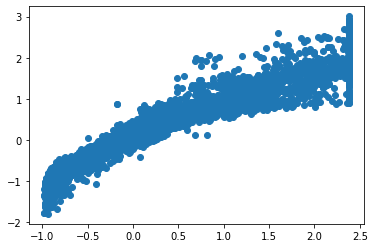

In [34]:
# plotting the actual test set with predicted values
plt.scatter(y_test, predicted_test)